In [10]:
import pandas as pd
from models.transformer_classifier import HateSpeechDetector
import importlib
import utils.evaluation as evaluator


In [11]:
importlib.reload(evaluator)

<module 'utils.evaluation' from '/Users/trinb/works/vietnamese-hate-speech-detection/utils/evaluation.py'>

### Prepare Test dataset

In [12]:
test = pd.read_csv("data/processed_test.csv", index_col=False)
test[test['text'].isna()]

,Unnamed: 0,text,labels
375,375,NaN,0
428,428,NaN,0
1591,1591,NaN,0


In [13]:
test = test.dropna()

In [14]:
test_texts = test['text'].values.tolist()
test_labels = test['labels'].values.tolist()

In [15]:
text_labels = {0:'clean', 1:'offensive', 2:'hate'}

## Bert Based Cased

In [5]:
bert_clf = HateSpeechDetector.load_model("models/bert-base-cased/")

F1 - micro: 0.8506666666666667
F1 - macro: 0.610387421951403


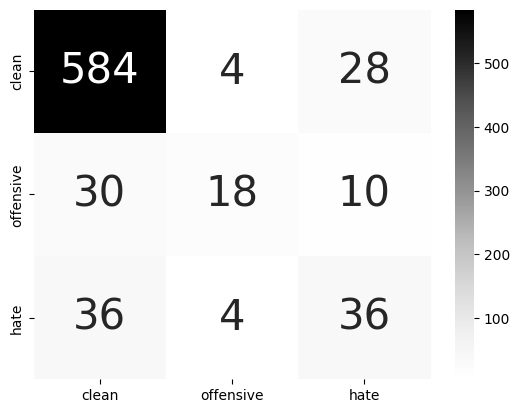

In [6]:
evaluator.evaluate(bert_clf, test_texts[0:750], test_labels[0:750])

## Pho Bert

In [16]:
phobert_clf = HateSpeechDetector.load_model("models/phobert2/")

['Như Quỳnh zoo zooo', 'Củ kỉ xấu_xí mầm chi', 'j giọng khàn_khàn éo thể iu dc', 'Tổ sử mấy thằng bênh_vực nhau .Thế gạt tay ??Lỡ thằng báo đấm vỡ mõm thằng CA xong bảo gạt xử thằng báo ko ??Toàn trò_hề bọn CA chó này !!', 'add viết tắt address nữa , ngu !', 'Chúc Tộc_Trưởng nghỉ lễ vui_vẻ .Chúc Tộc ca Tộc_Tỉ nghỉ lễ vui_vẻ', 'Đúng mày thức dân việt_nam ta bao ?', "Kg_Phan dong may ' chui vao lam gi ?", 'Đẹp_trai tài_năng tư đỉnh đỉnh thầy dell nha thầy tỉnh thầy hát hây nha', 'Bã thương', 'Sang đài_loan kiện công_ty đi tù việt_nam dmcs nun', 'Tr_Thanh_Tùngg gái', 'Bài mai', 'Anh mày nợ giang_hồ hóc_môn , mày nợ dám Việt_Nam , bày đặc banh', 'Fake_Real đi , mua tuỳ kiện', 'Con bóng đực kia dạng đầu_trâu_mặt_ngựa , 2 mặt , nịnh_bợ .', 'Nhung', 'Có CNXH xếp hình_thái_Kinh_tế giới không ?VÌ NƯỚC NÀO ÁP_DỤNG NÓ SẼ BỊ DIỆT_VONG CMNR CÒN TỒN_TẠI ĐÂU MÀ ÁP_DỤNG HÌNH_THÁI_KINH_TẾ KHÁC .', 'Do di nug lon', 'Trung đập thẻ , Trung phá_sản', 'Cực_kỳ thuyết_phục', 'Cái a hi_sinh xe_máy đáng .Giờ qu

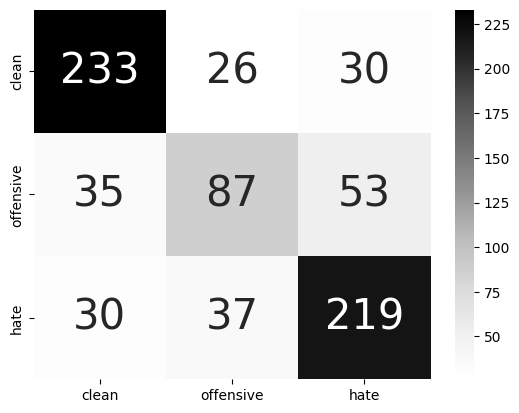

In [17]:
evaluator.evaluate(phobert_clf, test_texts[0:750], test_labels[0:750])